In [ ]:
pip install seaborn matplotlib numpy

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Data scrapping
scoreboard = []
url = 'https://www.mykhel.com/cricket/most-runs-in-odi-rs1/'
r = requests.get(url)
s = BeautifulSoup(r.content, "html.parser")
results = s.find('div',class_='os-cricket-stats-table-wrap')
stats_score = results.table.find_all('tr')

# Get Column Headers
stats_columns = []
for tr in stats_score:
    all_th = tr.find_all('th')
    for th in all_th: 
            stats_columns.append(th.text)

# Get Column Values
for tr in stats_score:
        all_td = tr.find_all('td')
        cell = []
        for td in all_td: 
            if td.text is not None: 
                cell.append(td.text) 
        if len(cell) != 0:
            scoreboard.append(cell)

# Data Refining
stats_columns.insert(1, 'img')
df = pd.DataFrame(scoreboard, columns = stats_columns)
df.drop(['img'], axis=1, inplace=True) 
print(df.to_string(index=False))
df.dtypes
df["Mat"] = df['Mat'].astype('int')
df["Inn"] = df['Inn'].astype('int')  
df["100s"] = df['100s'].astype('int')
df["50s"] = df['50s'].astype('int')
df["Avg"] = df['Avg'].astype('float')
df.dtypes

   #                   Player           Team   Mat   Inn     Runs Highest 100s  50s     Avg
  1         Sachin Tendulkar          India   463   452   18,426    200*   49   96   44.83 
  2         Kumar Sangakkara      Sri Lanka   404   380   14,234     169   25   93   41.98 
  3            Ricky Ponting      Australia   375   365   13,704     164   30   82   42.03 
  4        Sanath Jayasuriya      Sri Lanka   445   433   13,430     189   28   68   32.36 
  5              Virat Kohli          India   274   265   12,898     183   46   65   57.32 
  6       Mahela Jayawardene      Sri Lanka   448   418   12,650     144   19   77   33.37 
  7           Inzamam-ul-Haq       Pakistan   378   350   11,739    137*   10   83   39.52 
  8           Jacques Kallis   South Africa   328   314   11,579     139   17   86   44.36 
  9           Sourav Ganguly          India   311   300   11,363     183   22   72   41.02 
 10             Rahul Dravid          India   344   318   10,889     153   12   

#           object
Player      object
Team        object
Mat          int64
Inn          int64
Runs        object
Highest     object
100s         int64
50s          int64
Avg        float64
dtype: object

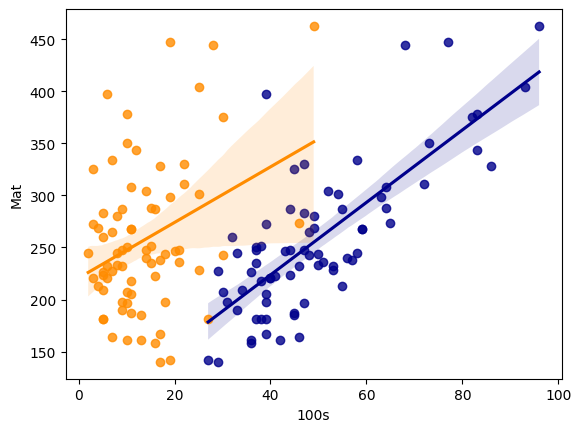

In [76]:
# VISUALIZE Data: Matches vs 100s
sns.regplot(y = "Mat", x = "50s", data=df, color="darkblue")
# VISUALIZE Data: Matches vs 50s
sns.regplot(y = "Mat", x = "100s", data=df, color="darkorange")
plt.show()